In [53]:
valid_codes = '''AUS,AUT,BEL,BGR,HRV,CHL,CZE,DNK,GBR,EST,FIN,FRA,DEU,GRC,HUN,ISL,ISR,ITA,LVA,LTU,LUX,NLD,NZL,NOR,POL,PRT,KOR,RUS,SVN,SVK,ESP,CHE,SWE,TWN,USA'''.split(",")

In [54]:
#these are the countries we have ex_mort data for from country codes text file
#thank you Alex
print(valid_codes)

['AUS', 'AUT', 'BEL', 'BGR', 'HRV', 'CHL', 'CZE', 'DNK', 'GBR', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'ISR', 'ITA', 'LVA', 'LTU', 'LUX', 'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'KOR', 'RUS', 'SVN', 'SVK', 'ESP', 'CHE', 'SWE', 'TWN', 'USA']


In [55]:
import pandas as pd
import numpy as np
ex_mort = pd.read_csv("clean_combined.csv")
safety = pd.read_csv("covid-stringency-index.csv")
#only use countries that we have ex_mort data for
safety = safety[safety["Code"].isin(valid_codes)]
#only use weeks from the pandemic
ex_mort = ex_mort[ex_mort["years_relative"] >=0]


#convert to datetime to grab week number and year
safety["Day"] =  pd.to_datetime(safety["Day"])

In [56]:
safety["week"] = safety["Day"].dt.week
safety['year'] = safety["Day"].dt.year

In [57]:
si_df = safety.groupby(["Code", "week", "year"])["stringency_index"].mean().reset_index()
si_df = si_df.rename(columns={"Code": "country"})
si_df.head(10)

,country,week,year,stringency_index
0,AUS,1,2021,70.830000
1,AUS,1,2022,43.451429
2,AUS,2,2021,55.090000
3,AUS,2,2022,44.244286
4,AUS,3,2021,55.090000
5,AUS,3,2022,64.221429
6,AUS,4,2020,1.853333
7,AUS,4,2021,57.338571
8,AUS,4,2022,64.680000
9,AUS,5,2020,7.940000


In [58]:
#put the stringency index averages per week into the rest of the data
df = pd.merge(ex_mort, si_df)
df.head(10)

,date,country,week,year,DTotal,mov_avg,years_relative,pred_deaths,excess_mortality,em_per_capita,...,new_cases,total_deaths,new_deaths,total_cases_per_million,hosp_patients,population,mov_avg_cases,new_cases_per_capita,normalized_cases,stringency_index
0,2020-02-02,CHL,4,2020,1964.0,2006.714286,0,1875.178571,131.535714,6.846410e-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2020-02-02,SWE,4,2020,1730.0,1791.000000,0,1861.609774,-70.609774,-6.949672e-06,...,1.0,NaN,0.0,0.098,NaN,10160159.0,1.0,9.842366e-08,3.057224e-06,0.0
2,2020-02-02,ESP,4,2020,9954.0,9006.428571,0,9470.538910,-464.110338,-8.516927e-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2020-02-02,DNK,4,2020,1033.0,1079.714286,0,1063.016484,16.697802,1.990192e-07,...,10.0,NaN,0.0,0.012,NaN,83900471.0,10.0,1.191888e-07,3.702230e-06,0.0
4,2020-02-02,LVA,4,2020,555.0,572.000000,0,555.143985,16.856015,1.814230e-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,2020-02-02,GRC,4,2020,2774.0,2668.285714,0,2680.928571,-12.642857,-1.853598e-07,...,2.0,NaN,0.0,0.029,NaN,68207114.0,2.0,2.932245e-08,9.108106e-07,0.0
6,2020-02-02,BEL,4,2020,2204.0,2263.142857,0,2273.806015,-10.663158,-9.166826e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,2020-02-02,LUX,4,2020,86.0,84.571429,0,84.822932,-0.251504,-4.902112e-09,...,12.0,NaN,0.0,0.078,NaN,51305184.0,7.0,1.364385e-07,4.238035e-06,0.0
8,2020-02-02,KOR,4,2020,6490.0,6244.000000,0,6382.580952,-138.580952,-2.703333e-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,2020-02-02,HUN,4,2020,2723.0,2580.000000,0,2673.120301,-93.120301,-8.979131e-06,...,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0


In [59]:
#loading vaccination data, converting date to week/year
owidVac = pd.read_csv("vaccinations.csv")
owidVac = owidVac[owidVac["iso_code"].isin(valid_codes)]

owidVac["date"] = pd.to_datetime(owidVac["date"])
owidVac["week"] = owidVac["date"].dt.week
owidVac['year'] = owidVac["date"].dt.year

In [60]:
#sort vaccination data, prepare for merge
vc = owidVac.groupby(["iso_code", "week", "year", "people_vaccinated", "people_fully_vaccinated"])["total_vaccinations"].max().reset_index()
vc = vc.rename(columns={"iso_code": "country"})
vc.head(10)

,country,week,year,people_vaccinated,people_fully_vaccinated,total_vaccinations
0,AUS,1,2022,20463839.0,19782523.0,42812691.0
1,AUS,1,2022,20475452.0,19806589.0,43024593.0
2,AUS,1,2022,20488662.0,19832376.0,43286155.0
3,AUS,1,2022,20503096.0,19857649.0,43558448.0
4,AUS,1,2022,20516623.0,19882365.0,43823668.0
5,AUS,1,2022,20524868.0,19896355.0,43987111.0
6,AUS,1,2022,20529932.0,19904821.0,44086608.0
7,AUS,2,2022,20578901.0,19928352.0,44374463.0
8,AUS,2,2022,20644440.0,19946441.0,44700720.0
9,AUS,2,2022,20714403.0,19967401.0,45045755.0


In [61]:
#merge vaccination data into dataset
df = pd.merge(df, vc)

df["percent_vaccinated"] = df["people_fully_vaccinated"]/df['population']*100
print(df["percent_vaccinated"].isna().sum())
#drop 133 na in percent vacc
df = df.dropna(subset = ['percent_vaccinated'])
print(df["percent_vaccinated"].isna().sum())
df.head(10)

df[df["country"] == "USA"]

0
0


,date,country,week,year,DTotal,mov_avg,years_relative,pred_deaths,excess_mortality,em_per_capita,...,hosp_patients,population,mov_avg_cases,new_cases_per_capita,normalized_cases,stringency_index,people_vaccinated,people_fully_vaccinated,total_vaccinations,percent_vaccinated
0,2020-12-20,USA,50,2020,81952.0,71991.142857,0,57378.114286,14613.028571,0.000044,...,109689.0,332915074.0,1.246826e+06,0.003745,0.116332,71.76,26321.0,6449.0,31762.0,0.001937
3,2020-12-27,USA,51,2020,82864.0,74772.857143,0,57984.942857,16787.914286,0.000050,...,114648.0,332915074.0,1.320415e+06,0.003966,0.123198,71.76,30754.0,6575.0,36356.0,0.001975
4,2020-12-27,USA,51,2020,82864.0,74772.857143,0,57984.942857,16787.914286,0.000050,...,114648.0,332915074.0,1.320415e+06,0.003966,0.123198,71.76,76563.0,6839.0,84328.0,0.002054
5,2020-12-27,USA,51,2020,82864.0,74772.857143,0,57984.942857,16787.914286,0.000050,...,114648.0,332915074.0,1.320415e+06,0.003966,0.123198,71.76,230719.0,7292.0,243701.0,0.002190
6,2020-12-27,USA,51,2020,82864.0,74772.857143,0,57984.942857,16787.914286,0.000050,...,114648.0,332915074.0,1.320415e+06,0.003966,0.123198,71.76,496429.0,8049.0,516306.0,0.002418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8739,2022-01-02,USA,52,2021,67512.0,66799.285714,2,64387.428571,2411.857143,0.000007,...,74692.0,332915074.0,1.164741e+06,0.003499,0.108673,53.24,242682298.0,208110373.0,512362989.0,62.511550
8740,2022-01-02,USA,52,2021,67512.0,66799.285714,2,64387.428571,2411.857143,0.000007,...,74692.0,332915074.0,1.164741e+06,0.003499,0.108673,53.24,243117501.0,208351642.0,514037936.0,62.584022
8741,2022-01-02,USA,52,2021,67512.0,66799.285714,2,64387.428571,2411.857143,0.000007,...,74692.0,332915074.0,1.164741e+06,0.003499,0.108673,53.24,243553688.0,208588393.0,515695587.0,62.655136
8742,2022-01-02,USA,52,2021,67512.0,66799.285714,2,64387.428571,2411.857143,0.000007,...,74692.0,332915074.0,1.164741e+06,0.003499,0.108673,53.24,243956725.0,208802687.0,517209719.0,62.719505


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


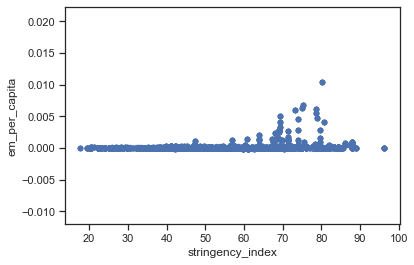

In [62]:
#visualizations to find cool patterns
import seaborn
import matplotlib.pyplot as plt
df.plot.scatter("stringency_index", "em_per_capita")


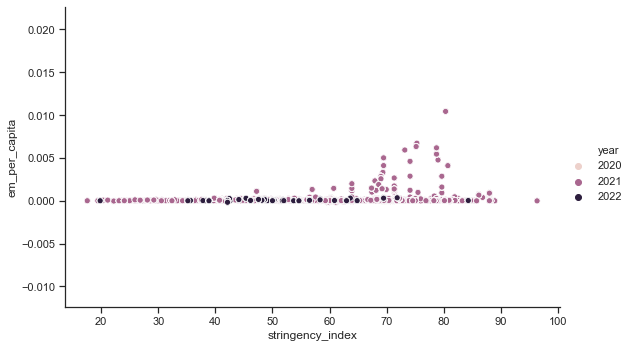

In [63]:
#using year to see patterns with seaborn
seaborn.set(style='ticks')
seaborn.relplot(data=df, x='stringency_index', y='em_per_capita', hue='year',  aspect=1.61)
plt.show()

In [64]:
#isolating a year, and kicking out italy
year2 = df[df["year"] == 2021]
year2 = year2[year2["country"] != "ITA"]
seaborn.relplot(data=year2, x='stringency_index', y='em_per_capita', aspect=1.61)
plt.show()

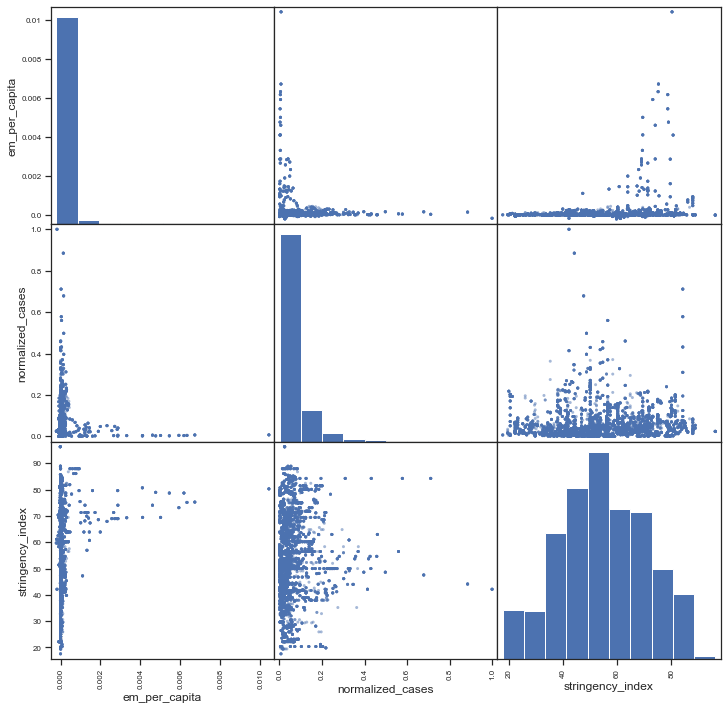

In [66]:
#scatterplot matrix to see more patterns
pd.plotting.scatter_matrix(df[["em_per_capita", "normalized_cases", "stringency_index"]], figsize=(12, 12))
plt.show()

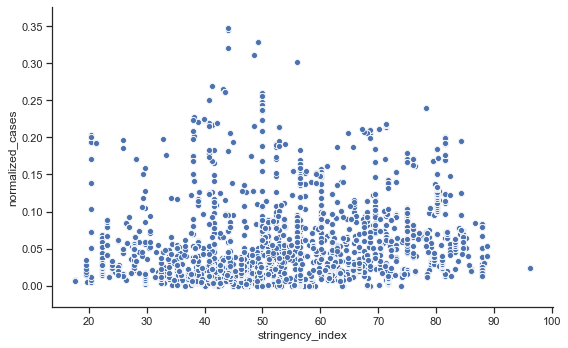

In [67]:
#isolating a viz
seaborn.relplot(data=year2, x='stringency_index', y='normalized_cases', aspect=1.61)
plt.show()

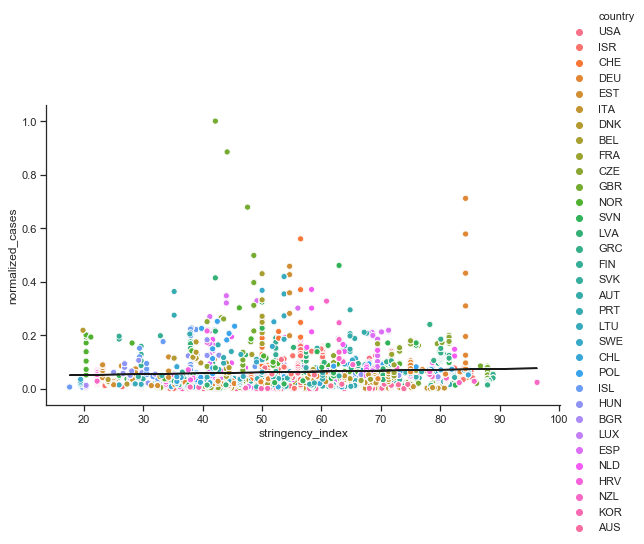

In [69]:
#regression on all data
from sklearn import linear_model
df = df[df['normalized_cases'].notna()]
reg = linear_model.LinearRegression()
testx = df[["stringency_index"]]
testy = df["normalized_cases"]
colors = df["country"]
reg.fit(testx, testy)
reg.score(testx, testy)
y_pred = reg.predict(testx)
seaborn.relplot(data=df, x='stringency_index', y='normalized_cases', hue='country',  aspect=1.61)
plt.plot(testx, y_pred, color ='k')
  
plt.show()

0


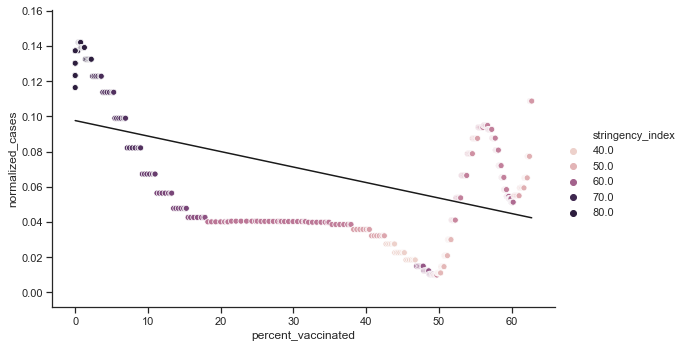

In [84]:
#regression on just USA
df = df[df["country"] == "USA"]
testx = df[["percent_vaccinated"]]
testy = df["normalized_cases"]

reg.fit(testx, testy)
reg.score(testx, testy)
y_pred = reg.predict(testx)
seaborn.relplot(data=df, x='percent_vaccinated', y='normalized_cases', hue='stringency_index',  aspect=1.61)

plt.plot(testx, y_pred, color ='k')
plt.xlabel("percent_vaccinated")
plt.ylabel("normalized_cases")
  
plt.show()

In [76]:
#scoring the linear regression
reg.score(testx, testy)

0.26274644490585

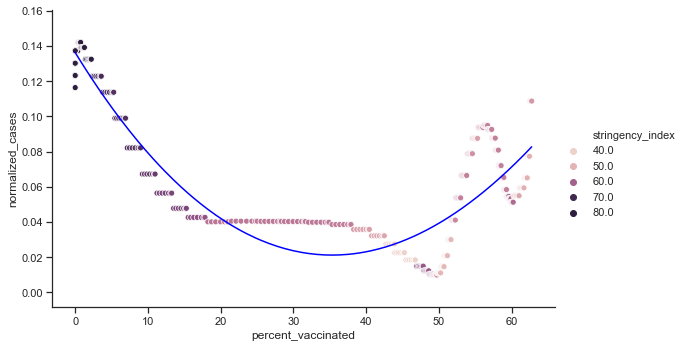

In [119]:
#polynomial regressionsfrom sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(testx)
pol_reg = linear_model.LinearRegression()
pol_reg.fit(X_poly, testy)

def viz_polymonial():
    seaborn.relplot(data=df, x='percent_vaccinated', y='normalized_cases', hue='stringency_index',  aspect=1.61)
    plt.plot(testx, pol_reg.predict(poly_reg.fit_transform(testx)), color='blue')
    plt.show()
    return
viz_polymonial()


coef=  [4.77426622e-06]
intercept=  0.014827271768873572


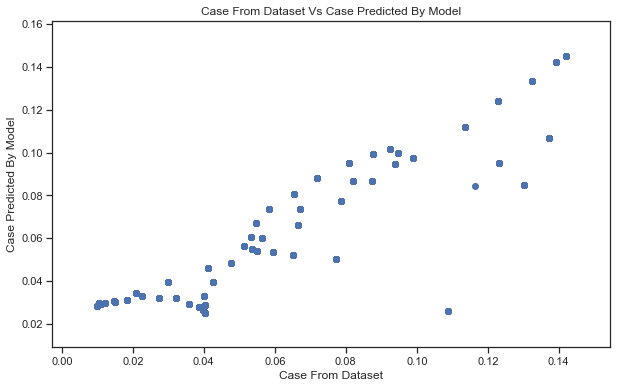

In [150]:
df = df.dropna(subset = ['excess_mortality'])
X = df[["excess_mortality"]]  # get input values from first two columns
y = df["normalized_cases"]  # get output values from last coulmn
m = len(y) # Number of training examples

model_ols =  linear_model.LinearRegression(normalize=True)
model_ols.fit(X,y)

coef = model_ols.coef_
intercept = model_ols.intercept_
print('coef= ', coef)
print('intercept= ', intercept)

predictedCase = pd.DataFrame(model_ols.predict(X), columns=['Predicted Cases']) # Create new dataframe of column'Predicted Price'
actualCase = pd.DataFrame(y, columns=['normalized_cases'])
actualCase = actualCase.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualCase,predictedCase],axis =1)
df_actual_vs_predicted.T

plt.scatter(y, model_ols.predict(X))
plt.xlabel('Case From Dataset')
plt.ylabel('Case Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Case From Dataset Vs Case Predicted By Model")
plt.show()

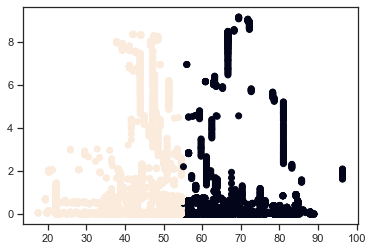

In [19]:

from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=2).fit_predict(testx)

plt.scatter(testx, testy, c=y_pred)

plt.show()

In [140]:
model_r = linear_model.Ridge(normalize= True, alpha= 50)
model_r.fit(X,y)
print('coef= ' , model_r.coef_)
print('intercept= ' , model_r.intercept_)

model_l = linear_model.Lasso(normalize= True, alpha= 0.55)
model_l.fit(X,y)
print('coef= ' , model_l.coef_)
print('intercept= ' , model_l.intercept_)

coef=  [-1.68877490e-05  6.78141134e-05]
intercept=  0.06093327739829761
coef=  [-0.  0.]
intercept=  0.06424767260725078


In [20]:
ridgereg = linear_model.Ridge(0.5)
ridgereg.fit(testx,testy)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

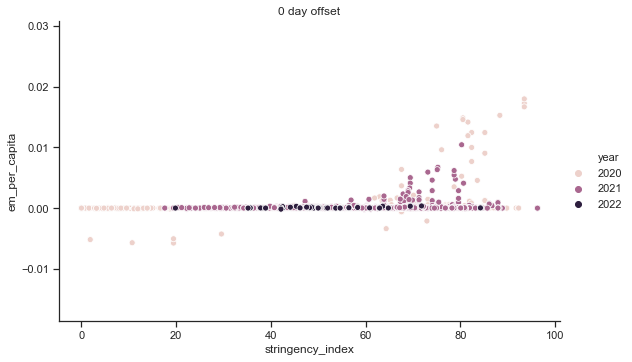

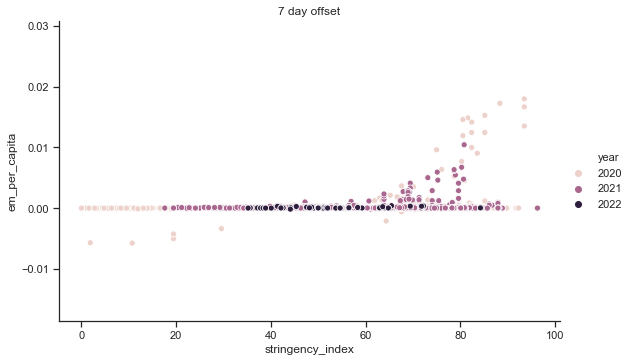

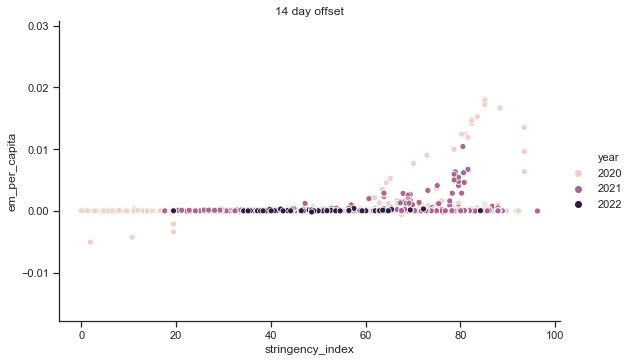

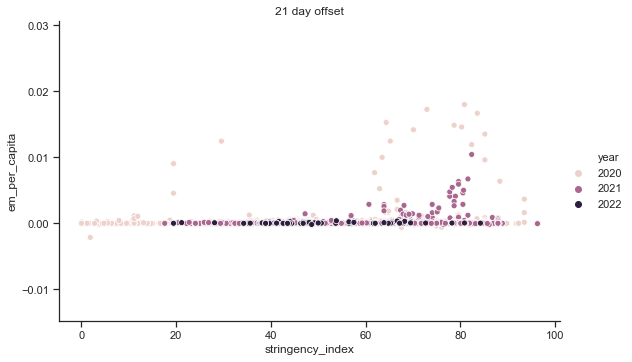

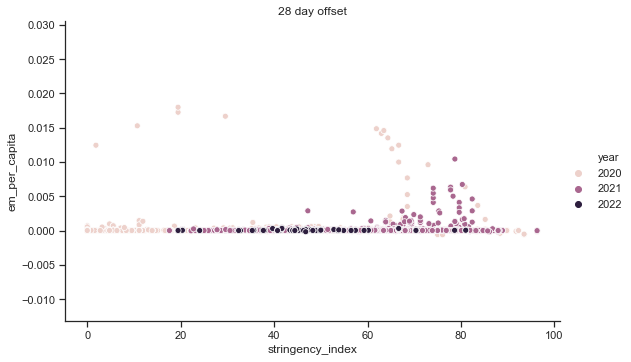

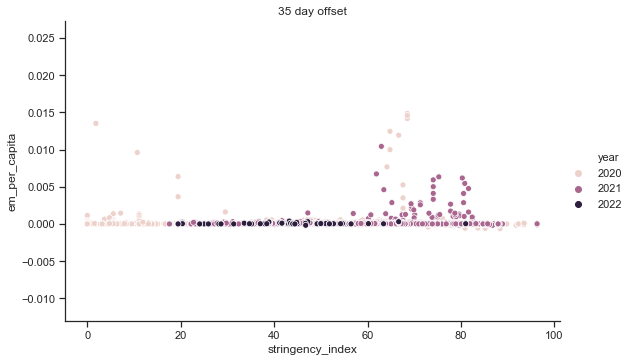

In [74]:
import datetime
ex_mort = pd.read_csv("clean_combined.csv")
safety = pd.read_csv("covid-stringency-index.csv")
#only use countries that we have ex_mort data for
safety = safety[safety["Code"].isin(valid_codes)]
#only use weeks from the pandemic
ex_mort = ex_mort[ex_mort["years_relative"] >=0]

for i in range(6):
    d = datetime.timedelta(days=i*7)
    #convert to datetime to grab week number and year
    safety["Day"] =  pd.to_datetime(safety["Day"])+d

    safety["week"] = safety["Day"].dt.week
    safety['year'] = safety["Day"].dt.year
    si_df = safety.groupby(["Code", "week", "year"])["stringency_index"].mean().reset_index()
    si_df = si_df.rename(columns={"Code": "country"})
    si_df.head(10)

    df = pd.merge(ex_mort, si_df)
    seaborn.relplot(data=df, x='stringency_index', y='em_per_capita', hue='year', aspect=1.61).set(title = "{} day offset".format(i*7))
    plt.show()